# 贷款违约预测

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import os
data_path = os.environ.get('DATA_PATH') + 'AI_Cheats/'

In [2]:
train = pd.read_csv(data_path + '531830/train.csv')
test = pd.read_csv(data_path + '531830/testA.csv')

In [3]:
train

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,799995,25000.0,3,14.49,860.41,C,C4,2659.0,7 years,1,...,6.0,2.0,12.0,13.0,10.0,14.0,0.0,0.0,0.0,3.0
799996,799996,17000.0,3,7.90,531.94,A,A4,29205.0,10+ years,0,...,15.0,16.0,2.0,19.0,2.0,7.0,0.0,0.0,0.0,0.0
799997,799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,...,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,...,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0


In [4]:
test

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,800000,14000.0,3,10.99,458.28,B,B3,7027.0,10+ years,0,...,8.0,4.0,15.0,19.0,6.0,17.0,0.0,0.0,1.0,3.0
1,800001,20000.0,5,14.65,472.14,C,C5,60426.0,10+ years,0,...,1.0,3.0,3.0,9.0,3.0,5.0,0.0,0.0,2.0,2.0
2,800002,12000.0,3,19.99,445.91,D,D4,23547.0,2 years,1,...,1.0,36.0,5.0,6.0,4.0,12.0,0.0,0.0,0.0,7.0
3,800003,17500.0,5,14.31,410.02,C,C4,636.0,4 years,0,...,7.0,2.0,8.0,14.0,2.0,10.0,0.0,0.0,0.0,3.0
4,800004,35000.0,3,17.09,1249.42,D,D1,368446.0,< 1 year,1,...,11.0,3.0,16.0,18.0,11.0,19.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,999995,7000.0,3,11.14,229.64,B,B2,330967.0,7 years,1,...,6.0,11.0,2.0,6.0,2.0,8.0,0.0,0.0,0.0,4.0
199996,999996,6000.0,3,6.24,183.19,A,A2,38930.0,1 year,1,...,5.0,14.0,12.0,13.0,6.0,25.0,0.0,0.0,0.0,0.0
199997,999997,14000.0,5,15.88,339.57,C,C4,282016.0,8 years,2,...,21.0,18.0,21.0,42.0,13.0,21.0,0.0,0.0,0.0,0.0
199998,999998,8000.0,3,18.06,289.47,D,D2,97.0,4 years,1,...,12.0,5.0,8.0,19.0,6.0,11.0,0.0,0.0,0.0,2.0


In [5]:
train['isDefault'].nunique()

2

In [6]:
# 查看一下所有的特征唯一值
for col in train.columns:
    print('{} 特征，唯一值个数{}'.format(col, train[col].nunique()))
    # 判断唯一值个数是否为 1
    if train[col].nunique() == 1:
        print(col, '唯一值为 1 ####################')

id 特征，唯一值个数800000
loanAmnt 特征，唯一值个数1540
term 特征，唯一值个数2
interestRate 特征，唯一值个数641
installment 特征，唯一值个数72360
grade 特征，唯一值个数7
subGrade 特征，唯一值个数35
employmentTitle 特征，唯一值个数248683
employmentLength 特征，唯一值个数11
homeOwnership 特征，唯一值个数6
annualIncome 特征，唯一值个数44926
verificationStatus 特征，唯一值个数3
issueDate 特征，唯一值个数139
isDefault 特征，唯一值个数2
purpose 特征，唯一值个数14
postCode 特征，唯一值个数932
regionCode 特征，唯一值个数51
dti 特征，唯一值个数6321
delinquency_2years 特征，唯一值个数30
ficoRangeLow 特征，唯一值个数39
ficoRangeHigh 特征，唯一值个数39
openAcc 特征，唯一值个数75
pubRec 特征，唯一值个数32
pubRecBankruptcies 特征，唯一值个数11
revolBal 特征，唯一值个数71116
revolUtil 特征，唯一值个数1286
totalAcc 特征，唯一值个数134
initialListStatus 特征，唯一值个数2
applicationType 特征，唯一值个数2
earliesCreditLine 特征，唯一值个数720
title 特征，唯一值个数39644
policyCode 特征，唯一值个数1
policyCode 唯一值为 1 ####################
n0 特征，唯一值个数39
n1 特征，唯一值个数33
n2 特征，唯一值个数50
n3 特征，唯一值个数50
n4 特征，唯一值个数46
n5 特征，唯一值个数65
n6 特征，唯一值个数107
n7 特征，唯一值个数70
n8 特征，唯一值个数102
n9 特征，唯一值个数44
n10 特征，唯一值个数76
n11 特征，唯一值个数5
n12 特征，唯一值个数5
n13 特征，唯一值个数28
n14 特征，唯一值个数31


In [7]:
train['policyCode'].value_counts()

policyCode
1.0    800000
Name: count, dtype: int64

In [8]:
# 去掉 id 和 policyCode
train.drop(['id', 'policyCode'], axis=1, inplace=True)
test.drop(['id', 'policyCode'], axis=1, inplace=True)
print(len(train.columns), len(test.columns))

45 44


In [9]:
# 统计缺失值个数
train.isnull().sum()

loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
n0                    40270
n1                    40270
n2                    40270
n3                    40270
n4                    33239
n5                  

In [10]:
# 查看数据的类型
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loanAmnt            800000 non-null  float64
 1   term                800000 non-null  int64  
 2   interestRate        800000 non-null  float64
 3   installment         800000 non-null  float64
 4   grade               800000 non-null  object 
 5   subGrade            800000 non-null  object 
 6   employmentTitle     799999 non-null  float64
 7   employmentLength    753201 non-null  object 
 8   homeOwnership       800000 non-null  int64  
 9   annualIncome        800000 non-null  float64
 10  verificationStatus  800000 non-null  int64  
 11  issueDate           800000 non-null  object 
 12  isDefault           800000 non-null  int64  
 13  purpose             800000 non-null  int64  
 14  postCode            799999 non-null  float64
 15  regionCode          800000 non-nul

In [11]:
train['grade'].value_counts()

grade
B    233690
C    227118
A    139661
D    119453
E     55661
F     19053
G      5364
Name: count, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

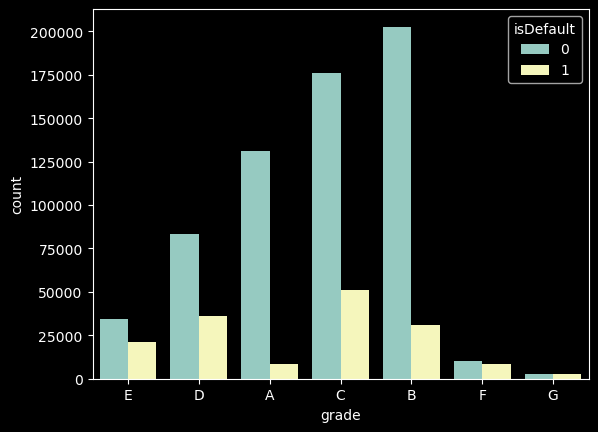

In [12]:
# 以直方图的形式，展示每个类型的数量
sns.countplot(x='grade', hue='isDefault', data=train)

<Axes: xlabel='homeOwnership', ylabel='count'>

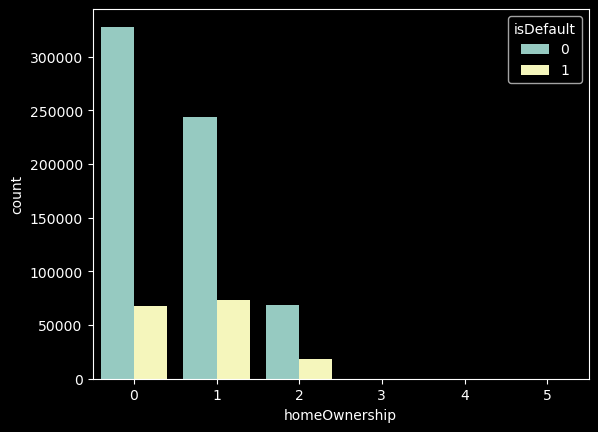

In [13]:
# homeOwnership 为借款人在登记时提供的房屋所有权状况
train['homeOwnership'].value_counts()
sns.countplot(x='homeOwnership', hue='isDefault', data=train)

<Axes: xlabel='purpose', ylabel='count'>

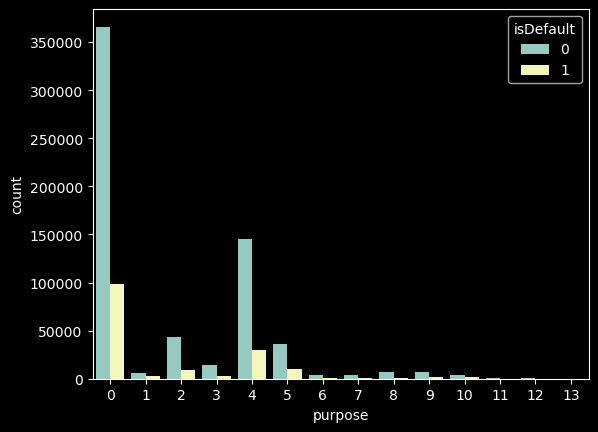

In [14]:
#  借款人在贷款申请时的贷款用途类别
train['purpose'].value_counts()
sns.countplot(x='purpose', hue='isDefault', data=train)


In [15]:
# 相关性系数，只对数值类型特征可以计算
# train.corr()

# 找到数值类型的特征
num_features = train.select_dtypes(include=float).columns
print('数值特征：{}'.format(num_features))

数值特征：Index(['loanAmnt', 'interestRate', 'installment', 'employmentTitle',
       'annualIncome', 'postCode', 'dti', 'delinquency_2years', 'ficoRangeLow',
       'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal',
       'revolUtil', 'totalAcc', 'title', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5',
       'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')


In [16]:
# 找到类别特征
cat_features = train.select_dtypes(exclude=float).columns
print('类别特征: {}'.format(cat_features))

类别特征: Index(['term', 'grade', 'subGrade', 'employmentLength', 'homeOwnership',
       'verificationStatus', 'issueDate', 'isDefault', 'purpose', 'regionCode',
       'initialListStatus', 'applicationType', 'earliesCreditLine'],
      dtype='object')


## 缺失值补全

In [17]:
train[cat_features].isnull().sum()

term                      0
grade                     0
subGrade                  0
employmentLength      46799
homeOwnership             0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
regionCode                0
initialListStatus         0
applicationType           0
earliesCreditLine         0
dtype: int64

In [18]:
train['employmentLength'].value_counts()

employmentLength
10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: count, dtype: int64

In [19]:
train['employmentLength'].fillna('10+ years', inplace=True)
train[cat_features].isnull().sum()

/var/folders/z4/ytcxq0ps02v3py23b74t70kh0000gn/T/ipykernel_85723/361922327.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['employmentLength'].fillna('10+ years', inplace=True)


term                  0
grade                 0
subGrade              0
employmentLength      0
homeOwnership         0
verificationStatus    0
issueDate             0
isDefault             0
purpose               0
regionCode            0
initialListStatus     0
applicationType       0
earliesCreditLine     0
dtype: int64

In [20]:
test['employmentLength'].value_counts()
test['employmentLength'].fillna('10+ years', inplace=True)
test['employmentLength'].isnull().sum()

/var/folders/z4/ytcxq0ps02v3py23b74t70kh0000gn/T/ipykernel_85723/3536825085.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['employmentLength'].fillna('10+ years', inplace=True)


0

In [21]:
train[num_features].isnull().sum()

loanAmnt                  0
interestRate              0
installment               0
employmentTitle           1
annualIncome              0
postCode                  1
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
title                     1
n0                    40270
n1                    40270
n2                    40270
n3                    40270
n4                    33239
n5                    40270
n6                    40270
n7                    40270
n8                    40271
n9                    40270
n10                   33239
n11                   69752
n12                   40270
n13                   40270
n14                   40270
dtype: int64

In [22]:
# train['employmentTitle'].value_counts()
train['employmentTitle'].median()

7755.0

In [23]:
for col in num_features:
    if train[col].isnull().sum() > 0:
        # print(col)
        train[col].fillna(train[col].median(), inplace=True)
    if test[col].isnull().sum() > 0:
        test[col].fillna(train[col].median(), inplace=True)

train.isnull().sum()

/var/folders/z4/ytcxq0ps02v3py23b74t70kh0000gn/T/ipykernel_85723/1488676597.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)
/var/folders/z4/ytcxq0ps02v3py23b74t70kh0000gn/T/ipykernel_85723/1488676597.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

/var/folders/z4/ytcxq0ps02v3py23b74t70kh0000gn/T/ipykernel_85723/1488676597.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)
/var/folders/z4/ytcxq0ps02v3py23b74t70kh0000gn/T/ipykernel_85723/1488676597.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

loanAmnt              0
term                  0
interestRate          0
installment           0
grade                 0
subGrade              0
employmentTitle       0
employmentLength      0
homeOwnership         0
annualIncome          0
verificationStatus    0
issueDate             0
isDefault             0
purpose               0
postCode              0
regionCode            0
dti                   0
delinquency_2years    0
ficoRangeLow          0
ficoRangeHigh         0
openAcc               0
pubRec                0
pubRecBankruptcies    0
revolBal              0
revolUtil             0
totalAcc              0
initialListStatus     0
applicationType       0
earliesCreditLine     0
title                 0
n0                    0
n1                    0
n2                    0
n3                    0
n4                    0
n5                    0
n6                    0
n7                    0
n8                    0
n9                    0
n10                   0
n11             

In [24]:
test.isnull().sum()

loanAmnt              0
term                  0
interestRate          0
installment           0
grade                 0
subGrade              0
employmentTitle       0
employmentLength      0
homeOwnership         0
annualIncome          0
verificationStatus    0
issueDate             0
purpose               0
postCode              0
regionCode            0
dti                   0
delinquency_2years    0
ficoRangeLow          0
ficoRangeHigh         0
openAcc               0
pubRec                0
pubRecBankruptcies    0
revolBal              0
revolUtil             0
totalAcc              0
initialListStatus     0
applicationType       0
earliesCreditLine     0
title                 0
n0                    0
n1                    0
n2                    0
n3                    0
n4                    0
n5                    0
n6                    0
n7                    0
n8                    0
n9                    0
n10                   0
n11                   0
n12             

## 转化数值编码

In [25]:
# train.info()
train.select_dtypes(include=object).columns

Index(['grade', 'subGrade', 'employmentLength', 'issueDate',
       'earliesCreditLine'],
      dtype='object')

In [26]:
# 找到需要处理的类别特征
# print('需要处理的类别特征: {}'.format(train.select_dtypes(include=object).columns))
train['grade'].value_counts()

grade
B    233690
C    227118
A    139661
D    119453
E     55661
F     19053
G      5364
Name: count, dtype: int64

In [27]:
# 按照制定顺序进行类别编码
train['grade'] = train['grade'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6})
test['grade'] = test['grade'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6})

In [28]:
train['grade'].value_counts()

grade
1    233690
2    227118
0    139661
3    119453
4     55661
5     19053
6      5364
Name: count, dtype: int64

In [29]:
train['subGrade'].value_counts()

subGrade
C1    50763
B4    49516
B5    48965
B3    48600
C2    47068
C3    44751
C4    44272
B2    44227
B1    42382
C5    40264
A5    38045
A4    30928
D1    30538
D2    26528
A1    25909
D3    23410
A3    22655
A2    22124
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: count, dtype: int64

In [30]:
temp = train['subGrade'].value_counts()
temp.sort_index(ascending=True)

subGrade
A1    25909
A2    22124
A3    22655
A4    30928
A5    38045
B1    42382
B2    44227
B3    48600
B4    49516
B5    48965
C1    50763
C2    47068
C3    44751
C4    44272
C5    40264
D1    30538
D2    26528
D3    23410
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: count, dtype: int64

In [31]:
grades = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
subgrade_index = 0
sub_map = {}
for grade in grades:
    for i in range(5):
        subgrade = grade+str(i+1)
        sub_map[subgrade]  = subgrade_index
        subgrade_index += 1
train['subGrade'] = train['subGrade'].map(sub_map)
train['subGrade'].value_counts().sort_index(ascending=True)

subGrade
0     25909
1     22124
2     22655
3     30928
4     38045
5     42382
6     44227
7     48600
8     49516
9     48965
10    50763
11    47068
12    44751
13    44272
14    40264
15    30538
16    26528
17    23410
18    21139
19    17838
20    14064
21    12746
22    10925
23     9273
24     8653
25     5925
26     4340
27     3577
28     2859
29     2352
30     1759
31     1231
32      978
33      751
34      645
Name: count, dtype: int64

In [32]:
test['subGrade'] = test['subGrade'].map(sub_map)
test['subGrade'].value_counts()

subGrade
10    12857
8     12423
9     12400
7     12100
11    11791
13    11110
12    11018
6     10898
5     10544
14     9925
4      9629
3      7753
15     7667
16     6713
0      6398
17     5821
2      5644
1      5503
18     5236
19     4487
20     3527
21     3175
22     2780
23     2414
24     2114
25     1462
26     1073
27      906
28      714
29      543
30      488
31      325
32      232
33      166
34      164
Name: count, dtype: int64

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loanAmnt            800000 non-null  float64
 1   term                800000 non-null  int64  
 2   interestRate        800000 non-null  float64
 3   installment         800000 non-null  float64
 4   grade               800000 non-null  int64  
 5   subGrade            800000 non-null  int64  
 6   employmentTitle     800000 non-null  float64
 7   employmentLength    800000 non-null  object 
 8   homeOwnership       800000 non-null  int64  
 9   annualIncome        800000 non-null  float64
 10  verificationStatus  800000 non-null  int64  
 11  issueDate           800000 non-null  object 
 12  isDefault           800000 non-null  int64  
 13  purpose             800000 non-null  int64  
 14  postCode            800000 non-null  float64
 15  regionCode          800000 non-nul

In [34]:
train.select_dtypes(include=object).columns

Index(['employmentLength', 'issueDate', 'earliesCreditLine'], dtype='object')

In [35]:
# 类别特征
train['employmentLength'].value_counts()

employmentLength
10+ years    309552
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: count, dtype: int64

In [36]:
temp = train['employmentLength'].value_counts()
temp.sort_index(ascending=True)

employmentLength
1 year        52489
10+ years    309552
2 years       72358
3 years       64152
4 years       47985
5 years       50102
6 years       37254
7 years       35407
8 years       36192
9 years       30272
< 1 year      64237
Name: count, dtype: int64

In [37]:
train['employmentLength'] = train['employmentLength'].map({'< 1 year':0,  '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years':6, '7 years':7, '8 years':8, '9 years':9, '10+ years':10})

In [38]:
train['employmentLength'].value_counts().sort_index(ascending=True)

employmentLength
0      64237
1      52489
2      72358
3      64152
4      47985
5      50102
6      37254
7      35407
8      36192
9      30272
10    309552
Name: count, dtype: int64

In [39]:
test['employmentLength'] = test['employmentLength'].map({'< 1 year':0,  '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years':6, '7 years':7, '8 years':8, '9 years':9, '10+ years':10})

In [40]:
test['employmentLength'].value_counts()

employmentLength
10    77514
2     18207
3     16011
0     15989
1     13182
5     12543
4     11833
6      9328
8      8976
7      8823
9      7594
Name: count, dtype: int64

In [41]:
train.select_dtypes(include=object).columns

Index(['issueDate', 'earliesCreditLine'], dtype='object')

In [42]:
# 转化为 Pandas 中的日期格式
train['issueDate'] = pd.to_datetime(train['issueDate'])
test['issueDate'] = pd.to_datetime(test['issueDate'])
print('train min date: {}, test min date: {}'.format(train['issueDate'].min(), test['issueDate'].min()))

train min date: 2007-06-01 00:00:00, test min date: 2007-07-01 00:00:00


In [43]:
# 设置起始时间
base_time = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')

In [44]:
# 设置日期类型特征值为 diff
train['issueDate'] = train['issueDate'].apply(lambda x: x-base_time).dt.days
test['issueDate'] = test['issueDate'].apply(lambda x: x-base_time).dt.days

In [45]:
train['issueDate']

0         2587
1         1888
2         3044
3         2983
4         3196
          ... 
799995    3318
799996    2131
799997    3044
799998    2802
799999    4079
Name: issueDate, Length: 800000, dtype: int64

In [46]:
train.select_dtypes(include=object).columns

Index(['earliesCreditLine'], dtype='object')

In [47]:
train['earliesCreditLine']

0         Aug-2001
1         May-2002
2         May-2006
3         May-1999
4         Aug-1977
            ...   
799995    Aug-2011
799996    May-1989
799997    Jul-2002
799998    Jan-1994
799999    Feb-2002
Name: earliesCreditLine, Length: 800000, dtype: object

In [48]:
train['earliesCreditLine'] = pd.to_datetime(train['earliesCreditLine'])
test['earliesCreditLine'] = pd.to_datetime(test['earliesCreditLine'])
print('train min date: {}, test min date: {}'.format(train['earliesCreditLine'].min(), test['earliesCreditLine'].min()))

train min date: 1944-01-01 00:00:00, test min date: 1944-01-01 00:00:00


/var/folders/z4/ytcxq0ps02v3py23b74t70kh0000gn/T/ipykernel_85723/1357032935.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['earliesCreditLine'] = pd.to_datetime(train['earliesCreditLine'])
/var/folders/z4/ytcxq0ps02v3py23b74t70kh0000gn/T/ipykernel_85723/1357032935.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test['earliesCreditLine'] = pd.to_datetime(test['earliesCreditLine'])


In [49]:
base_time = datetime.datetime.strptime('1944-01-01', '%Y-%m-%d')
train['earliesCreditLine'] = train['earliesCreditLine'].apply(lambda x: x-base_time).dt.days
test['earliesCreditLine'] = test['earliesCreditLine'].apply(lambda x: x-base_time).dt.days

In [50]:
train['earliesCreditLine'].value_counts()

earliesCreditLine
21032    5567
21793    5403
21397    5403
21093    5258
20667    5246
         ... 
5875        1
4992        1
4199        1
5965        1
731         1
Name: count, Length: 720, dtype: int64

<Axes: >

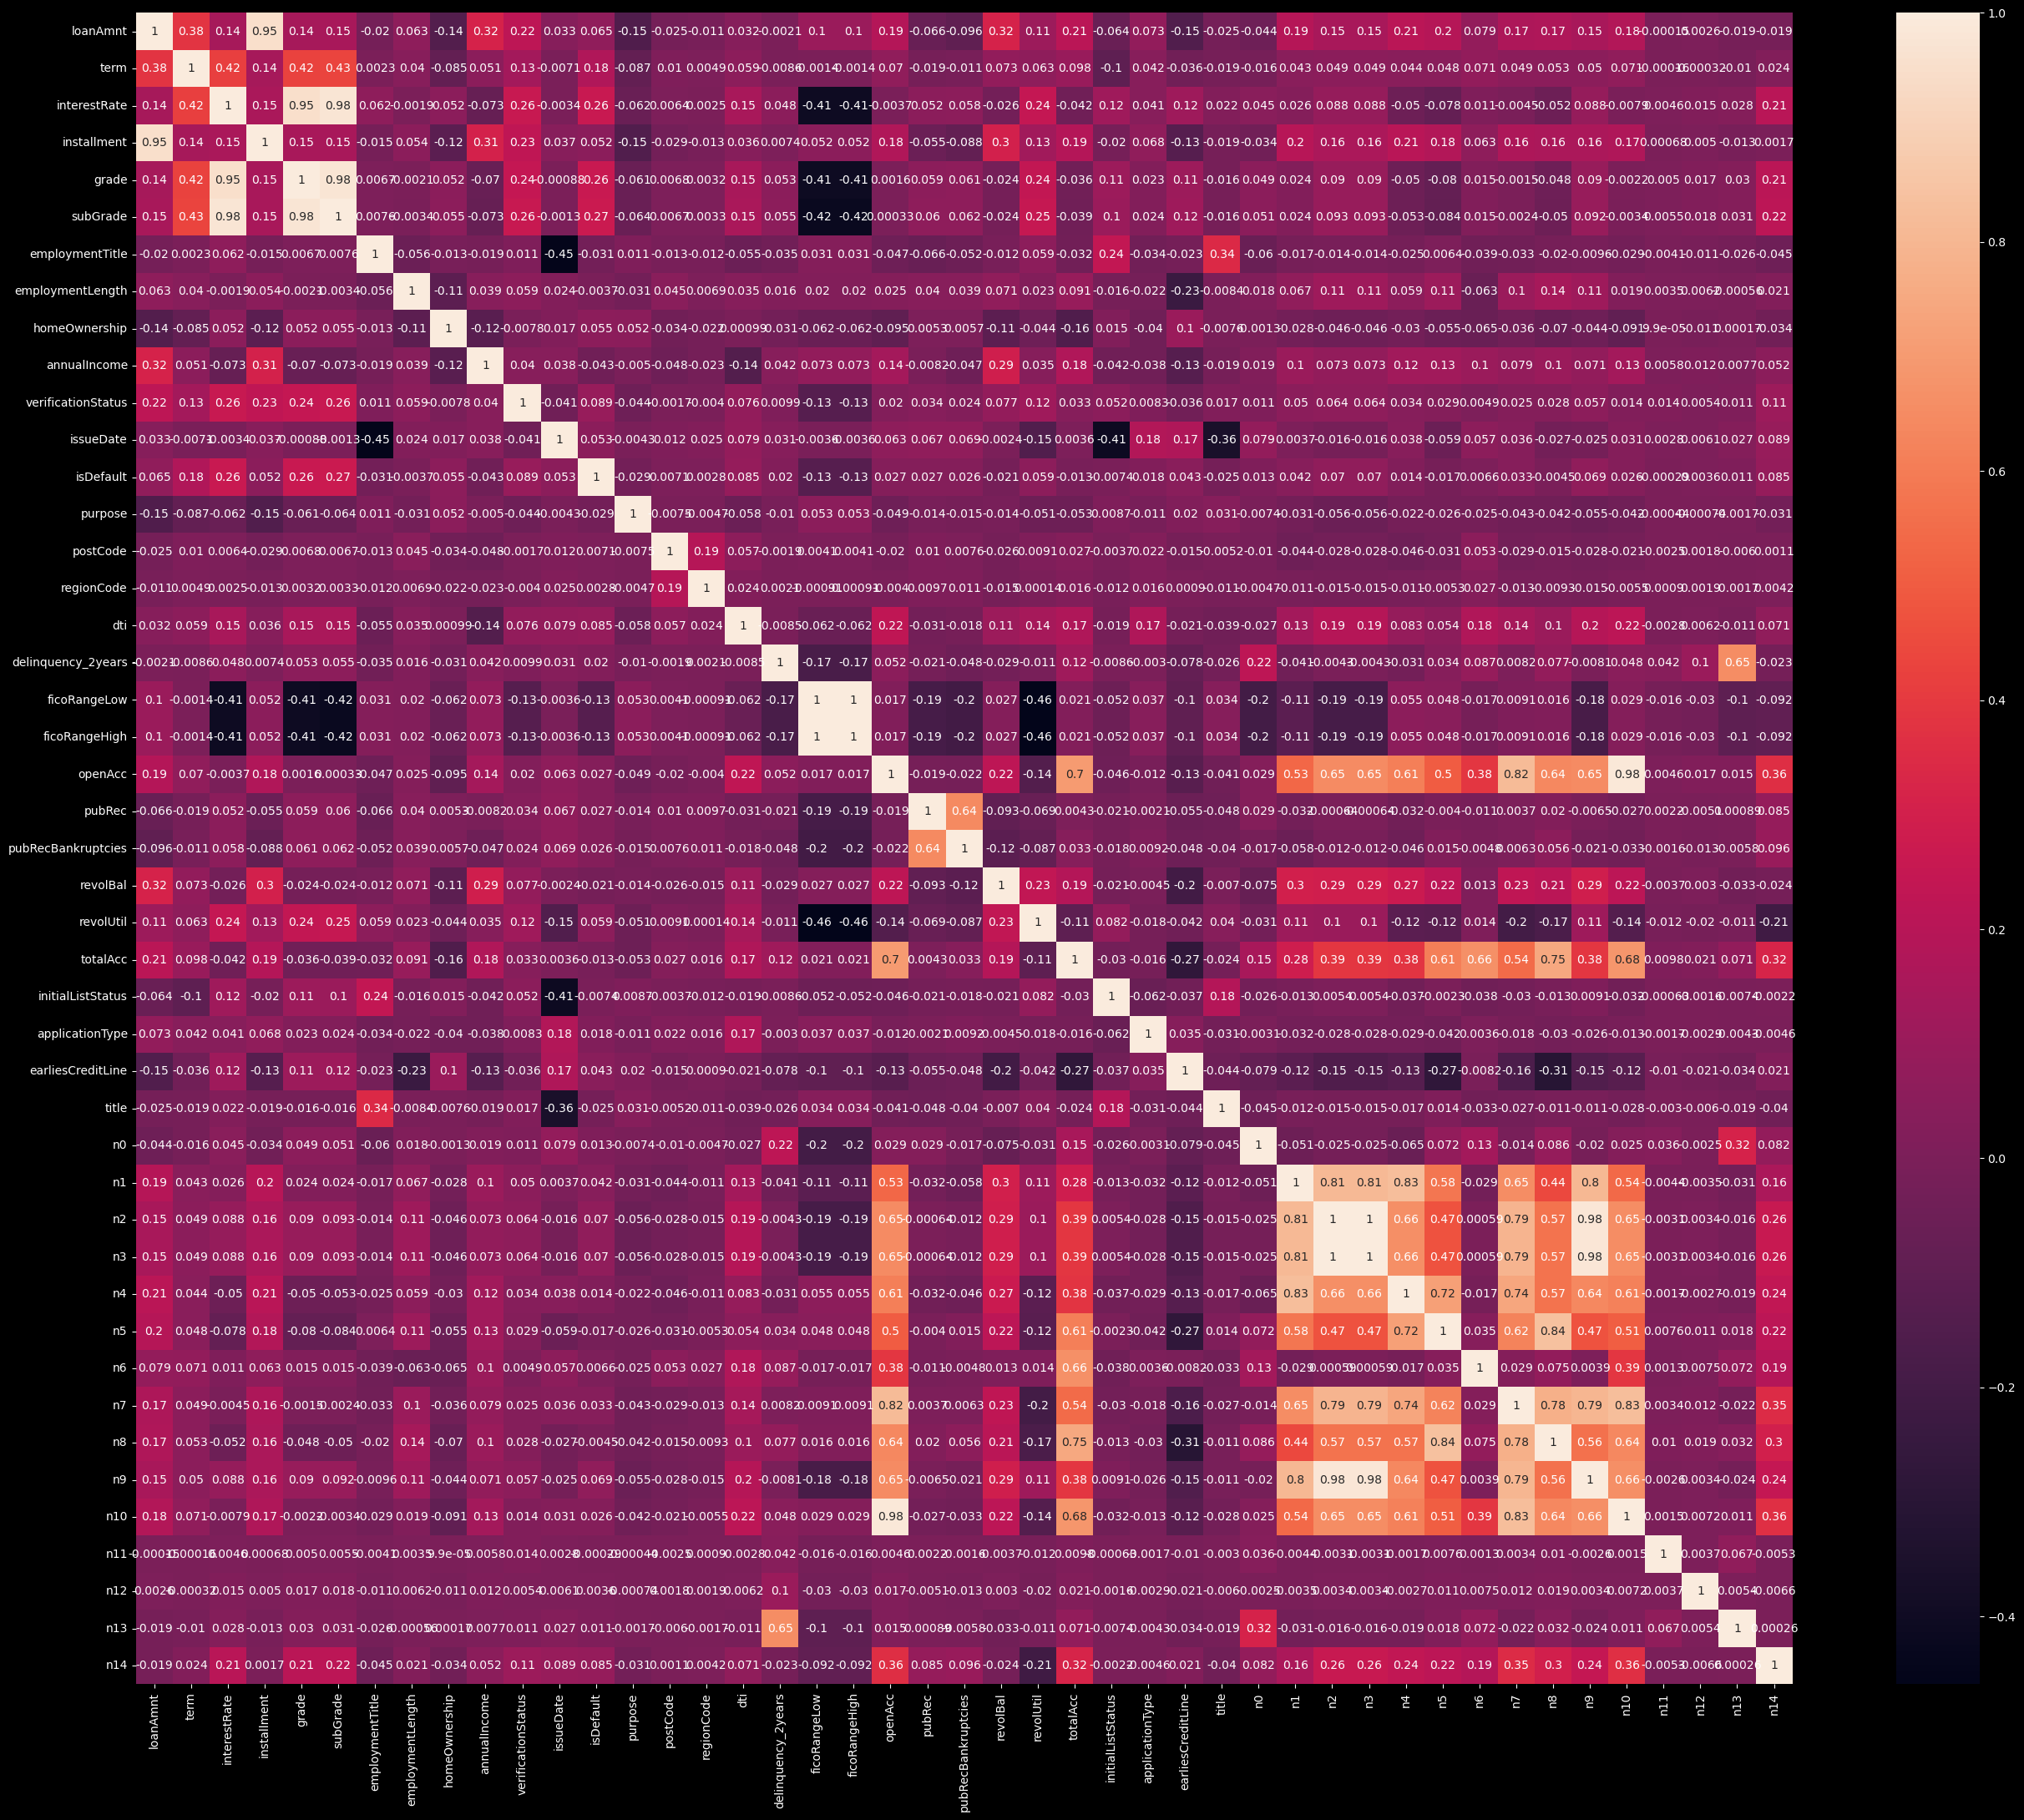

In [51]:
train.corr()
plt.figure(figsize=(32, 26))
sns.heatmap(train.corr(), annot=True)

In [52]:
%%time

clf = LGBMClassifier(
    num_leaves=2**5-1, reg_alpha=0.25, reg_lambda=0.25, objective='binary', max_depth=-1, learning_rate=0.005, min_child_samples=3, random_state=2023, n_estimators=2000, subsample=1, colsample_bytree=1
)

train_X, test_X, train_y, test_y = train_test_split(train.drop(['isDefault'], axis=1), train['isDefault'], test_size=0.2, random_state=2023)
# train_X

clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)
y_pred

[LightGBM] [Info] Number of positive: 127712, number of negative: 512288
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3940
[LightGBM] [Info] Number of data points in the train set: 640000, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199550 -> initscore=-1.389109
[LightGBM] [Info] Start training from score -1.389109
CPU times: user 2min 6s, sys: 33.6 s, total: 2min 39s
Wall time: 30.1 s


array([0, 0, 0, ..., 0, 0, 0])

In [53]:
print('Accuracy: {}'.format(accuracy_score(y_pred, test_y)))
print('AUC : {}'.format(roc_auc_score(y_pred, test_y)))

Accuracy: 0.8058875
AUC : 0.6956198372904435


## 使用全量数据进行训练，测试集进行预测

In [54]:
%%time
clf.fit(train.drop(['isDefault'], axis=1), train['isDefault'])
result = clf.predict_proba(test)[:, 1]
result

[LightGBM] [Info] Number of positive: 159610, number of negative: 640390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3938
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199513 -> initscore=-1.389344
[LightGBM] [Info] Start training from score -1.389344
CPU times: user 2min 35s, sys: 33.5 s, total: 3min 9s
Wall time: 32.3 s


array([0.07173634, 0.33175495, 0.50728124, ..., 0.18494668, 0.27338017,
       0.03319145])

In [55]:
test2 = pd.read_csv(data_path + '531830/testA.csv')
test2 = test2[['id']]
test2['isDefault'] = result
test2.to_csv(data_path + '531830/baseline_lgb_2000.csv', index=False)